In [354]:
# loading required libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [16]:
# loading integrated dataset
data = pd.read_csv("integrated_data.csv")
data.head()

,area_code,area,year_code,year,item_code,item,producer_price,producer_price_index,area_harvested,laying,...,total_pesticide_use_per_value_of_agri_production,total_pesticide_export_quantity,total_pesticide_export_value,total_pesticide_import_quantity,total_pesticide_import_value,temp_change_dec_jan_feb,temp_change_mar_apr_may,temp_change_jun_jul_aug,temp_change_sep_oct_nov,temp_change_meteorological_year
0,1,Armenia,1997,1997,15,Wheat,225.3,89.40,108000.0,NaN,...,0.05,3.604,3.687,117.861,298.379,2.166,-0.319,0.870,0.184,0.725
1,1,Armenia,1998,1998,15,Wheat,205.6,83.91,118300.0,NaN,...,0.06,3.604,3.687,207.171,340.124,-0.259,1.483,2.145,2.027,1.349
2,1,Armenia,1999,1999,15,Wheat,177.5,76.79,110129.0,NaN,...,0.07,3.604,3.687,296.481,381.869,3.535,0.814,1.611,0.264,1.556
3,1,Armenia,2000,2000,15,Wheat,163.5,71.30,106581.0,NaN,...,0.08,3.604,3.687,160.902,482.955,1.148,0.723,2.166,0.364,1.100
4,1,Armenia,2001,2001,15,Wheat,166.0,74.51,108554.0,NaN,...,0.09,1.145,9.068,200.884,698.022,1.818,2.072,1.578,0.409,1.469


In [7]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392856 entries, 0 to 392855
Data columns (total 117 columns):
 #    Column                                            Dtype  
---   ------                                            -----  
 0    area_code                                         int64  
 1    area                                              object 
 2    year_code                                         int64  
 3    year                                              int64  
 4    item_code                                         int64  
 5    item                                              object 
 6    producer_price                                    float64
 7    producer_price_index                              float64
 8    area_harvested                                    float64
 9    laying                                            float64
 10   milk_animals                                      float64
 11   producing_animals_or_slaughtered                  

In [4]:
# Remove the row-limit so that any Series/DataFrame will print in full
pd.set_option('display.max_rows', None)

In [8]:
# total number of missing values per column
data.isna().sum()

area_code                                                0
area                                                     0
year_code                                                0
year                                                     0
item_code                                                0
item                                                     0
producer_price                                      234985
producer_price_index                                  3062
area_harvested                                      160052
laying                                              383668
milk_animals                                        378227
producing_animals_or_slaughtered                    362410
production                                           85041
yield                                               137470
yield_or_carcass_weight                             362643
gross_production_value                              158536
gross_production_index                              1476

In [467]:
# proportion of missing values for each column
prop_na_merged = data.isna().mean().sort_values(ascending=False)*100
prop_na_merged.head(10)

laying                                  97.661230
milk_animals                            96.276244
terms_of_trade                          96.191734
import_market_concentration_index       95.509041
export_market_concentration_index       95.460932
self_sufficiency_ratio                  95.230568
import_dependency_ratio                 95.230568
revealed_comparative_advantage_index    94.950058
yield_or_carcass_weight                 92.309396
producing_animals_or_slaughtered        92.250087
dtype: float64

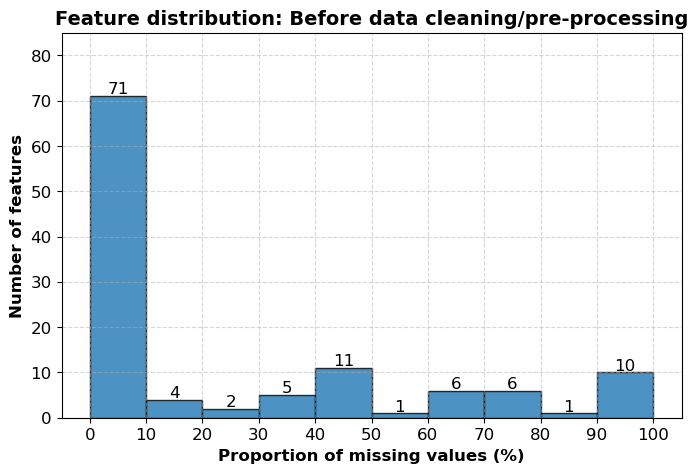

In [ ]:
# Histogram to better understand the proportion of missing values in the columns
plt.figure(figsize=(8,5))

# plot histogram and get the counts and bin edges
counts, edges, bars = plt.hist(
    prop_na_merged,
    bins = list(range(0,101,10)),
    alpha = 0.8,
    edgecolor = 'black'
)
# add frequency labels above bars
for count, edge in zip(counts, edges[:-1]):
    plt.text(edge + 5, count + 0.5, str(int(count)), ha='center', fontsize=12)

plt.title('Feature distribution: Before data cleaning/pre-processing', fontsize=14, fontweight='bold')
plt.xlabel('Proportion of missing values (%)', fontsize=12, fontweight='bold')
plt.ylabel('Number of features', fontsize=12, fontweight='bold')
plt.xticks(list(range(0,101,10)), fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,85)
plt.grid(linestyle='--', alpha=0.5)

# saving plot as png image
plt.savefig('plots/feat_dist_pre_clean.png', dpi=360, bbox_inches='tight')

plt.show()

Out of 117 features in the integrated dataset, 24 of them have missing values 
over 50%. Whereas, 75 features have missing values below 20%. There are 10 features 
with over 90% missing values. 

We have to deal with the missing values before we train our models. 

The top 10 columns having highest missing values are: 

1. laying                                  (97.66%)
2. milk_animals                            (96.27%)
3. terms_of_trade                          (96.19%)
4. import_market_concentration_index       (95.50%)
5. export_market_concentration_index       (95.46%)
6. self_sufficiency_ratio                  (95.23%)
7. import_dependency_ratio                 (95.23%)
8. revealed_comparative_advantage_index    (94.95%)
9. yield_or_carcass_weight                 (92.30%)
10. producing_animals_or_slaughtered        (92.25%)

We will definitely remove these 10 features having missing values over 90%. We don't have 
ways to safely impute so many missing values in a column without introducing bias. 

In [468]:
# proportion of missing values for each column
prop_na_merged = data.isna().mean().sort_values(ascending=False)*100
prop_na_merged.head(10)

laying                                  97.661230
milk_animals                            96.276244
terms_of_trade                          96.191734
import_market_concentration_index       95.509041
export_market_concentration_index       95.460932
self_sufficiency_ratio                  95.230568
import_dependency_ratio                 95.230568
revealed_comparative_advantage_index    94.950058
yield_or_carcass_weight                 92.309396
producing_animals_or_slaughtered        92.250087
dtype: float64

In addition to the 10 features with over 90% missing values, we also need to evaluate the 36 features with missing values between 10% and 90%. Our goal is to retain as many of these columns as possible, as we aim to minimize data loss.

The strategy involves identifying patterns of missingness across these columns—specifically, whether the missing data is concentrated in certain rows. This approach is based on the assumption that for specific food items and countries, data may be consistently unavailable. By removing such rows, we may be able to preserve a greater number of these columns for analysis.

In [ ]:
# Selecting the columns with missing values between 10 and 90 %
feature_list_subset = list(prop_na_merged.loc[(prop_na_merged.values > 10) & (prop_na_merged.values < 90)].index)
len(feature_list_subset)

36

There are 36 columns out of 117 having missing data between 10% and 90%.

In [51]:
feature_list_subset[0:6]

['govt_expenditure_on_ag',
 'export_quantity_index',
 'export_value_index',
 'import_quantity_index',
 'import_value_index',
 'fdi_food_industry']

The original dataset contains a total of 166 countries and 202 items. To investigate the middle 36 columns—those with missing values ranging between 10% and 90%—we need to identify the specific countries and items for which these columns have available data. This step is essential to determine whether the overall missingness in these columns can be reduced by removing countries and items lacking sufficient data. However, this strategy may not always be feasible. Therefore, our first objective is to identify the countries and items that contribute most to the missing data in these 36 columns.

In [ ]:
# Initialize empty lists to store the number of countries and items with 
# non-missing values for each of the 36 selected columns
Number_of_countries = []
Number_of_items = []

# Iterate over each feature in the selected subset of features
for feature in feature_list_subset:
    # count number of unique countries where this feature is not missing
    num_of_countries = len(data.loc[data[feature].notna()]['area'].unique())
    Number_of_countries.append(num_of_countries)

    # count number of unique items where this feature is not missing
    num_of_items = len(data.loc[data[feature].notna()]['item'].unique())
    Number_of_items.append(num_of_items)

# create a dataframe to summarize the number of non-missing countries and items 
# for each feature
df = pd.DataFrame({
    'Feature': feature_list_subset,
    'Number_of_countries': Number_of_countries,
    'Number_of_items': Number_of_items
})

# print the entire dataframe without row indices
print(df.to_string(index=False))

                                     Feature  Number_of_countries  Number_of_items
                      govt_expenditure_on_ag                   96              202
                       export_quantity_index                  161               51
                          export_value_index                  161               51
                       import_quantity_index                  163               51
                          import_value_index                  163               51
                           fdi_food_industry                   71              197
                     fdi_food_industry_share                   71              197
ag_forest_fish_as_share_of_total_expenditure                  103              202
          govt_expenditure_on_ag_forest_fish                  103              202
                    fdi_ag_forest_fish_share                  101              201
                          fdi_ag_forest_fish                  101              201
    

As shown in the dataframe above, which summarizes the middle 36 features out of a total of 117 in our integrated dataset, we can begin to assess which of these columns are worth retaining and which might need to be removed.

For each of the 36 columns, we have listed the number of countries and items for which data is available. This was important because the missing values in these columns are associated with specific combinations of countries and items.

The dataset contains 166 countries and 202 items in total. For example, the column "govt_expenditure_on_ag" has approximately 81% missing values. Upon inspection, it has data for only 96 countries but covers all 202 items, suggesting that the missingness is primarily due to the absence of country-level data.

In contrast, some other columns with high missingness have data for as few as 51 items, indicating that they are largely incomplete at the item level. These columns are strong candidates for removal, as imputing such a large volume of missing values may not be justified.

However, before discarding these columns entirely, one possible strategy is to remove rows related to animal and animal product items. This makes logical sense, as four of the top 10 features with more than 90% missing data were related to such items—specifically: 'laying', 'milk_animals', 'yield_or_carcass_weight', and 'producing_animals_or_slaughtered'.

Therefore, the next step is to identify and remove rows corresponding to these items and any countries with systematically missing data, in an effort to preserve more features for analysis.

### Removing undesired items

In [263]:
df_items = df.loc[(df['Number_of_items'] > 150) & (df['Number_of_items'] < 190)]
df_items

,Feature,Number_of_countries,Number_of_items
13,producer_price,162,185
14,export_quantity,164,157
15,export_value,164,157
17,import_quantity,165,158
21,import_value,165,158
24,gross_production_value,158,170
25,gross_production_index,164,155
26,yield,166,153
31,production,166,179


In [67]:
items = list(data['item'].unique())
items[40:60]

['Raw milk of cattle',
 'Meat of cattle with the bone, fresh or chilled (biological)',
 'Meat of sheep, fresh or chilled',
 'Raw milk of sheep',
 'Shorn wool, greasy, including fleece-washed shorn wool',
 'Meat of sheep, fresh or chilled (biological)',
 'Raw milk of goats',
 'Meat of pig with the bone, fresh or chilled',
 'Meat of pig with the bone, fresh or chilled (biological)',
 'Pulses, Total',
 'Meat of chickens, fresh or chilled',
 'Hen eggs in shell, fresh',
 'Meat of chickens, fresh or chilled (biological)',
 'Meat of rabbits and hares, fresh or chilled',
 'Meat of rabbits and hares, fresh or chilled (biological)',
 'Natural honey',
 'Cereals, primary',
 'Roots and Tubers, Total',
 'Treenuts, Total',
 'Vegetables Primary']

In [ ]:
# removing items related to animals or animal-based products
keywords = [
    'meat', 'milk', 'eggs', 'wool', 'leather', 'animals', 'birds', 'cattle', 
    'honey', 'silk-worm', 'livestock', 'beeswax'
]

animal_related_items = []

for item in items:
    if any(keyword in item.lower() for keyword in keywords):
        animal_related_items.append(item)

print(f"Number of animal related items: {len(animal_related_items)}")



Number of animal related items: 43


In [79]:
animal_related_items[0:10]

['Meat of cattle with the bone, fresh or chilled',
 'Raw milk of cattle',
 'Meat of cattle with the bone, fresh or chilled (biological)',
 'Meat of sheep, fresh or chilled',
 'Raw milk of sheep',
 'Shorn wool, greasy, including fleece-washed shorn wool',
 'Meat of sheep, fresh or chilled (biological)',
 'Raw milk of goats',
 'Meat of pig with the bone, fresh or chilled',
 'Meat of pig with the bone, fresh or chilled (biological)']

In [296]:
filtered_data_1 = data.loc[~data['item'].isin(animal_related_items)]
len(filtered_data_1['item'].unique())

159

In [297]:
features_items = list(df_items['Feature'].unique())
items_to_remove = []
for feature in features_items:
    item_list = list(filtered_data_1.loc[filtered_data_1[feature].notna()]['item'].unique())
    total_items = list(filtered_data_1['item'].unique())
    remaining_items = list(set(total_items) - set(item_list))
    items_to_remove += remaining_items

items_to_remove = set(items_to_remove)
len(items_to_remove)

31

In [ ]:
items_to_remove = list(items_to_remove)
items_to_remove

['String beans',
 'Brazil nuts, in shell',
 'Cereals, primary',
 'Citrus Fruit, Total',
 'Bananas cavendish',
 'Vegetables&Melons, Total',
 'Agriculture',
 'Cashewapple',
 'Flax, processed but not spun',
 'Peppermint, spearmint',
 'Ramie, raw or retted',
 'Tung nuts',
 'Mushrooms and truffles',
 'Palm oil',
 'Oilcrops, Oil Equivalent',
 'Vegetables Primary',
 'Agave fibres, raw, n.e.c.',
 'Cotton seed',
 'Fruit excl Melons, Total',
 'Cotton lint, ginned',
 'Fruit Primary',
 'Coarse Grain, Total',
 'Jute & Jute-like Fibres',
 'Palm kernels',
 'Pulses, Total',
 'True hemp, raw or retted',
 'Roots and Tubers, Total',
 'Treenuts, Total',
 'Plantains',
 'Oil palm fruit',
 'Seed cotton, unginned']

In [303]:
filtered_data_1['item'].value_counts().sort_values(ascending=True).head(15)

item
True hemp, raw or retted     101
Peppermint, spearmint        102
Quinoa                       102
Maté leaves                  102
Cashewapple                  102
Kola nuts                    116
Bambara beans, dry           118
Bananas cavendish            131
Abaca, manila hemp, raw      136
Brazil nuts, in shell        136
Ramie, raw or retted         136
Pyrethrum, dried flowers     136
Agave fibres, raw, n.e.c.    170
Plantains                    198
Tung nuts                    199
Name: count, dtype: int64

In [300]:
items_to_keep = [
    'Oilcrops, Oil Equivalent', 'Cotton seed', 'Cotton lint, ginned',
    'Seed cotton, unginned', 'Palm oil', 'Flax, processed but not spun'
    ]

items_to_remove = list(set(items_to_remove) - set(items_to_keep))
len(items_to_remove)

25

In [355]:
filtered_data_2 = filtered_data_1.loc[
    (~filtered_data_1['item'].isin(items_to_remove))
]

len(filtered_data_2['item'].unique())

134

### Removing undesired countries

In [441]:
req_features = df['Feature'].loc[
    (df['Number_of_countries'] > 100) & 
    (df['Number_of_countries'] < 131)
    ]
req_features = list(req_features)
req_features

['ag_forest_fish_as_share_of_total_expenditure',
 'govt_expenditure_on_ag_forest_fish',
 'fdi_ag_forest_fish_share',
 'fdi_ag_forest_fish',
 'afs_employment_share_in_total_employment',
 'credit_to_ag_forest_fish_2015_usd',
 'credit_to_ag_forest_fish_share_totalcredit',
 'agri_orientation_index_2015_usd',
 'total_employment_afs']

In [442]:
# Get the countries where it has all the entries missing for at least one of the 
# features in req_features
country_missing_count = Counter()
problem_countries = set()
for feature in req_features:
    missing_countries = filtered_data_2.groupby('area')[feature].apply(
        lambda x: x.isna().all()
    )
    nan_countries = missing_countries.loc[missing_countries == True].index.tolist()
    problem_countries.update(nan_countries)
    country_missing_count.update(nan_countries)

print(
    f"Total number of unique countries with missing values for at least one "
    f"of these columns: {len(problem_countries)}"
    )


Total number of unique countries with missing values for at least one of these columns: 117


In [408]:
print(country_missing_count.items())

dict_items([('Algeria', 7), ('Antigua and Barbuda', 6), ('Argentina', 2), ('Bahrain', 6), ('Bangladesh', 2), ('Barbados', 4), ('Belize', 4), ('Benin', 6), ('Bhutan', 2), ('Botswana', 4), ('Brunei Darussalam', 7), ('Burkina Faso', 6), ('Burundi', 4), ('Cabo Verde', 4), ('Cambodia', 2), ('Cameroon', 9), ('Central African Republic', 9), ('Chad', 7), ('Congo', 9), ('Cuba', 9), ("Côte d'Ivoire", 2), ('Ecuador', 2), ('Equatorial Guinea', 9), ('Eritrea', 9), ('Ethiopia', 2), ('Fiji', 5), ('Gambia', 4), ('Ghana', 2), ('Guinea', 9), ('Guyana', 4), ('Honduras', 2), ('Iran (Islamic Republic of)', 2), ('Jamaica', 4), ('Lebanon', 4), ('Madagascar', 5), ('Malawi', 4), ('Malaysia', 4), ('Mali', 4), ('Mexico', 2), ('Morocco', 4), ('Namibia', 4), ('New Zealand', 4), ('Nicaragua', 2), ('Niger', 4), ('Palestine', 7), ('Philippines', 2), ('Puerto Rico', 9), ('Saint Lucia', 6), ('Saint Vincent and the Grenadines', 6), ('Samoa', 7), ('Saudi Arabia', 7), ('Senegal', 4), ('Serbia and Montenegro', 9), ('Sierra

In [452]:
# Set the threshold to remove countries
threshold = 4


countries_to_remove = []
for country, count in country_missing_count.items():
    if count > threshold:
        countries_to_remove.append(country)

print(
    f"Total number of countries to be removed: {len(countries_to_remove)}"
)

print(countries_to_remove)

Total number of countries to be removed: 35
['Algeria', 'Antigua and Barbuda', 'Bahrain', 'Benin', 'Brunei Darussalam', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Chad', 'Congo', 'Cuba', 'Equatorial Guinea', 'Eritrea', 'Fiji', 'Guinea', 'Madagascar', 'Palestine', 'Puerto Rico', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Saudi Arabia', 'Serbia and Montenegro', 'Sierra Leone', 'Sudan (former)', 'Turkmenistan', 'Venezuela (Bolivarian Republic of)', 'China, Hong Kong SAR', 'Cook Islands', 'Kuwait', 'Luxembourg', 'New Caledonia', 'South Africa', 'Uzbekistan', 'Paraguay']


In [453]:
filtered_data_3 = filtered_data_2.loc[~(filtered_data_2['area'].isin(countries_to_remove))]
len(filtered_data_3['area'].unique())

131

In [454]:
# proportion of missing values for each column
prop_na_filtered = filtered_data_3.isna().mean().sort_values(ascending=False)*100
prop_na_filtered.head(10)

yield_or_carcass_weight                 100.000000
laying                                  100.000000
milk_animals                            100.000000
producing_animals_or_slaughtered        100.000000
terms_of_trade                           93.528687
import_market_concentration_index        92.525374
export_market_concentration_index        92.441681
import_dependency_ratio                  92.059732
self_sufficiency_ratio                   92.059732
revealed_comparative_advantage_index     91.612350
dtype: float64

In [455]:
columns_to_drop = list(prop_na_filtered.keys()[0:17])
columns_to_drop

['yield_or_carcass_weight',
 'laying',
 'milk_animals',
 'producing_animals_or_slaughtered',
 'terms_of_trade',
 'import_market_concentration_index',
 'export_market_concentration_index',
 'import_dependency_ratio',
 'self_sufficiency_ratio',
 'revealed_comparative_advantage_index',
 'govt_expenditure_on_ag',
 'export_quantity_index',
 'export_value_index',
 'import_quantity_index',
 'import_value_index',
 'fdi_food_industry_share',
 'fdi_food_industry']

In [456]:
filtered_data_4 = filtered_data_3.drop(columns_to_drop, axis = 1)
filtered_data_4.shape

(197147, 100)

In [457]:
prop_na_values = filtered_data_4.isna().mean().sort_values(ascending=False)*100

features = prop_na_values.loc[
    (prop_na_values.values > 10) &
    (prop_na_values.values < 61)
]

countries = []
items = []
feature_list = []
for feature in features.index:
    feature_list.append(feature)
    num_countries = len(filtered_data_4['area'].loc[filtered_data_4[feature].notna()].unique())
    countries.append(num_countries)
    num_items = len(filtered_data_4['item'].loc[filtered_data_4[feature].notna()].unique())
    items.append(num_items)

df_4 = pd.DataFrame({
    'Feature': feature_list,
    'Num_of_countries': countries,
    'Num_of_items': items
})

df_4


,Feature,Num_of_countries,Num_of_items
0,ag_forest_fish_as_share_of_total_expenditure,95,134
1,govt_expenditure_on_ag_forest_fish,95,134
2,fdi_ag_forest_fish,96,133
3,fdi_ag_forest_fish_share,96,133
4,producer_price,128,133
5,afs_employment_share_in_total_employment,111,134
6,total_employment_afs,117,134
7,credit_to_ag_forest_fish_share_totalcredit,112,134
8,credit_to_ag_forest_fish_2015_usd,112,134
9,agri_orientation_index_2015_usd,112,134


In [466]:
# proportion of missing values for each column
prop_na_filtered_4 = filtered_data_4.isna().mean().sort_values(ascending=False)*100
prop_na_filtered_4.head(10)

agri_trade_openness_index                       61.035167
share_of_agri_exports_to_gdp                    61.035167
ag_forest_fish_as_share_of_total_expenditure    59.498750
govt_expenditure_on_ag_forest_fish              59.459185
fdi_ag_forest_fish                              57.953202
fdi_ag_forest_fish_share                        57.953202
producer_price                                  44.971011
afs_employment_share_in_total_employment        42.215707
total_employment_afs                            40.204517
credit_to_ag_forest_fish_share_totalcredit      38.559552
dtype: float64

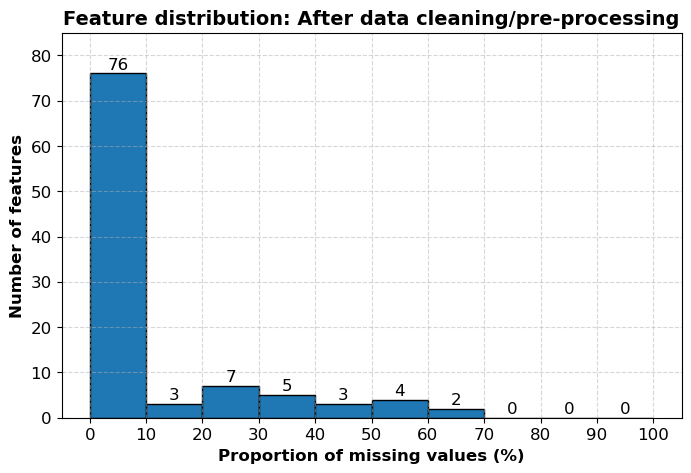

In [ ]:
# Understanding amount of missing data among the features through histogram
plt.figure(figsize=(8,5))
counts, edges, bars = plt.hist(
    prop_na_filtered_4, 
    edgecolor='black',
    bins=list(range(0,101,10))
    )
plt.title('Feature distribution: After data cleaning/pre-processing', fontsize=14, fontweight='bold')
plt.xlabel("Proportion of missing values (%)", fontweight='bold', fontsize=12)
plt.ylabel("Number of features", fontweight='bold', fontsize=12)
plt.xticks(list(range(0,101,10)) ,fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,85)
plt.grid(linestyle='--', alpha=0.5)

# adding frequency labels on bars
for count, edge in zip(counts, edges[:-1]):
    plt.text(edge+5, count+1, str(int(count)), ha='center', fontsize=12)

# saving plot as png image
plt.savefig('plots/feat_dist_post_clean.png', dpi=360, bbox_inches='tight')

plt.show()